# Re-code the house price machine learning

### 1.Random Choose Method to get optimal k and b

In [98]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random
data = load_boston()
X, Y = data['data'], data['target']

In [99]:
def price(k, rm, b):
    return rm * k + b

In [100]:
% matplotlib inline

$$loss_1=\frac{1}{n}\sum{(y_i-\hat{y_i})^2}$$

In [112]:
def mean_square_loss(y, y_hat):
    return sum((y_i-y_i_hat)**2 for y_i, y_i_hat in zip(list(y), list(y_hat))) / len(y)

$$loss_2=\frac{1}{n}\sum{|y_i-\hat{y_i}|}$$

In [111]:
def abs_loss(y, y_hat):
    return sum(abs(y_i-y_i_hat) for y_i, y_i_hat in zip(list(y), list(y_hat))) / len(y)

In [102]:
def draw_x_and_y():
    plt.scatter(X[:,5], Y)

In [103]:
x = X[:,5]
y = Y[:] # data set

In [113]:
training_times = 2000
min_loss = float('inf')
best_k = None
best_b = None

print('1st random choose method')
for i in range(training_times):
    k = random.randint(-100, 100)
    b = random.randint(-100, 100)
    price_by_random_k_and_b = [price(k, rm, b) for rm in x]
    cur_loss = mean_square_loss(Y, price_by_random_k_and_b)
    
    if cur_loss < min_loss:
        min_loss = cur_loss
        best_k,best_b = k, b
        print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, k, b, cur_loss))
        
price_by_random_k_and_b = [price(best_k, rm, best_b) for rm in x]

1st random choose method
times 0 	k:-49,	b:14,	loss:101866.38979416405
times 1 	k:-17,	b:88,	loss:2090.8922367252967
times 2 	k:-1,	b:65,	loss:1403.0589791442692
times 6 	k:7,	b:-34,	loss:203.03847372134385
times 93 	k:0,	b:25,	loss:90.50660079051382
times 107 	k:7,	b:-23,	loss:48.15043024308304
times 1895 	k:9,	b:-33,	loss:44.66433044861659


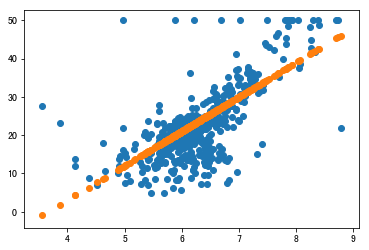

In [114]:
draw_x_and_y()
plt.scatter(x, price_by_random_k_and_b)

### 2.Supervised Direction to get optimal k and b

In [167]:
training_times = 20000
min_loss = float('inf')

best_k = random.randint(-100, 100)
best_b = random.randint(-100, 100)

direction = [
    (-1, +1),
    (-1, -1),
    (+1, +1),
    (+1, -1)
]

next_direction = random.choice(direction)

scalar = 0.1

for i in range(training_times):
    k_direction, b_direction = next_direction
    cur_k = best_k + k_direction * scalar
    cur_b = best_b + b_direction * scalar
    
    price_by_supervised_direction = [price(cur_k, rm, cur_b) for rm in x]
    cur_loss = mean_square_loss(x, price_by_supervised_direction)
    
    if cur_loss < min_loss:
        min_loss = cur_loss
        best_k, best_b = cur_k, cur_b
        next_direction = next_direction
        print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, best_k, best_b, cur_loss))
    else:
        next_direction = random.choice(direction)
price_by_supervised_direction = [price(best_k, rm, best_b) for rm in x]

times 0 	k:-32.9,	b:-88.9,	loss:91739.47272121518
times 1 	k:-32.8,	b:-88.80000000000001,	loss:91296.75006581562
times 2 	k:-32.699999999999996,	b:-88.70000000000002,	loss:90855.0985822834
times 3 	k:-32.599999999999994,	b:-88.60000000000002,	loss:90414.51827061873
times 4 	k:-32.49999999999999,	b:-88.50000000000003,	loss:89975.00913082168
times 5 	k:-32.39999999999999,	b:-88.40000000000003,	loss:89536.57116289188
times 6 	k:-32.29999999999999,	b:-88.30000000000004,	loss:89099.2043668297
times 7 	k:-32.19999999999999,	b:-88.20000000000005,	loss:88662.90874263503
times 8 	k:-32.09999999999999,	b:-88.10000000000005,	loss:88227.6842903077
times 9 	k:-31.999999999999986,	b:-88.00000000000006,	loss:87793.5310098478
times 10 	k:-31.899999999999984,	b:-87.90000000000006,	loss:87360.44890125545
times 11 	k:-31.799999999999983,	b:-87.80000000000007,	loss:86928.43796453059
times 12 	k:-31.69999999999998,	b:-87.70000000000007,	loss:86497.49819967324
times 13 	k:-31.59999999999998,	b:-87.600000000

times 223 	k:-10.59999999999978,	b:-66.60000000000127,	loss:19527.037802601397
times 224 	k:-10.49999999999978,	b:-66.50000000000128,	loss:19323.1864736477
times 225 	k:-10.39999999999978,	b:-66.40000000000128,	loss:19120.406316561464
times 226 	k:-10.29999999999978,	b:-66.30000000000129,	loss:18918.69733134274
times 227 	k:-10.19999999999978,	b:-66.2000000000013,	loss:18718.059517991427
times 228 	k:-10.099999999999781,	b:-66.1000000000013,	loss:18518.492876507637
times 229 	k:-9.999999999999782,	b:-66.00000000000131,	loss:18319.99740689129
times 230 	k:-9.899999999999782,	b:-65.90000000000131,	loss:18122.573109142413
times 231 	k:-9.799999999999782,	b:-65.80000000000132,	loss:17926.21998326104
times 232 	k:-9.699999999999783,	b:-65.70000000000132,	loss:17730.938029247074
times 233 	k:-9.599999999999783,	b:-65.60000000000133,	loss:17536.72724710063
times 234 	k:-9.499999999999783,	b:-65.50000000000134,	loss:17343.587636821634
times 235 	k:-9.399999999999784,	b:-65.40000000000134,	loss

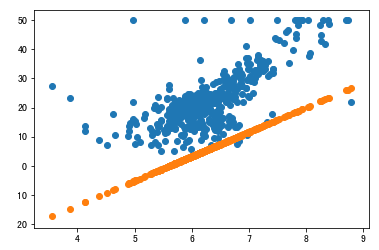

In [169]:
draw_x_and_y()
plt.scatter(x,price_by_supervised_direction)

### 3. Gradient Descent to get optimal k and b.

$$loss_1=\frac{1}{n}\sum{(y_i-\hat{y_i})^2}$$
$$d_k=-\frac{2}{n}\sum{(y_i-\hat{y_i})x_i}$$
$$d_b=-\frac{2}{n}\sum{(y_i-\hat{y_i})}$$

In [180]:
def partial_k(x, y, y_hat):
    return sum((y_i - y_i_hat) * x_i for x_i, y_i, y_i_hat in zip(list(x), list(y), list(y_hat))) * (-2 / len(y))
def partial_b(x, y, y_hat):
    return sum(y_i - y_i_hat for x_i, y_i, y_i_hat in zip(list(x), list(y), list(y_hat))) * (-2 / len(y))

In [181]:
x = X[:,5]
y = Y[:] # data set

In [201]:
training_times = 2000
min_loss = float('inf')
best_k = random.random() * 150 - 75
best_b = random.random() * 150 - 75
learning_rate = 1e-4

for i in range(training_times):
    price_by_gradient_descent = [price(best_k, rm, best_b) for rm in x]
    k_direction = partial_k(x, y, price_by_gradient_descent)
    b_direction = partial_b(x, y, price_by_gradient_descent)
    
    # upadate
    best_k -= k_direction * learning_rate
    best_b -= b_direction * learning_rate
    cur_loss = mean_square_loss(x, price_by_gradient_descent)
    print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, best_k, best_b, cur_loss))

times 0 	k:49.087163063674815,	b:-55.428087031741235,	loss:62999.946732027616
times 1 	k:48.79345861955809,	b:-55.47419382766357,	loss:62040.726547185324
times 2 	k:48.50216113678277,	b:-55.519922237216875,	loss:61096.64135513272
times 3 	k:48.21325088919318,	b:-55.56527536145283,	loss:60167.44838284578
times 4 	k:47.92670831229859,	b:-55.61025627600856,	loss:59252.908785134954
times 5 	k:47.64251400194823,	b:-55.65486803131495,	loss:58352.7875808158
times 6 	k:47.36064871301731,	b:-55.69911365280317,	loss:57466.85358991939
times 7 	k:47.08109335810369,	b:-55.74299614110961,	loss:56594.87937192587
times 8 	k:46.803829006235276,	b:-55.786518472279056,	loss:55736.64116500319
times 9 	k:46.528836881587985,	b:-55.829683597966245,	loss:54891.91882623602
times 10 	k:46.25609836221427,	b:-55.87249444563573,	loss:54060.49577282744
times 11 	k:45.985594978782,	b:-55.91495391876016,	loss:53242.15892425837
times 12 	k:45.717308413323735,	b:-55.957064897016885,	loss:52436.698645389944
times 13 	k:

times 498 	k:13.840957879065863,	b:-60.93660274131956,	loss:473.1764135295806
times 499 	k:13.836071624400217,	b:-60.937305931474604,	loss:471.8611589328547
times 500 	k:13.831225333197958,	b:-60.9380028393268,	loss:470.5586878100733
times 501 	k:13.826418677940307,	b:-60.938693516363756,	loss:469.2688626633201
times 502 	k:13.821651333792653,	b:-60.93937801365112,	loss:467.991547655835
times 503 	k:13.816922978582557,	b:-60.94005638183604,	loss:466.7266085896826
times 504 	k:13.812233292777927,	b:-60.940728671150566,	loss:465.4739128837415
times 505 	k:13.807581959465388,	b:-60.9413949314151,	loss:464.23332955201096
times 506 	k:13.802968664328814,	b:-60.942055212041716,	loss:463.0047291822424
times 507 	k:13.798393095628043,	b:-60.942709562037564,	loss:461.7879839148697
times 508 	k:13.793854944177768,	b:-60.94335803000813,	loss:460.58296742225576
times 509 	k:13.789353903326601,	b:-60.94400066416057,	loss:459.38955488823296
times 510 	k:13.784889668936298,	b:-60.944637512306954,	los

times 1039 	k:13.247506275967817,	b:-60.9947791146904,	loss:329.1603598539596
times 1040 	k:13.24743949050749,	b:-60.99472474430036,	loss:329.14777742287515
times 1041 	k:13.24737317084865,	b:-60.994670300839964,	loss:329.13529759832
times 1042 	k:13.247307313174034,	b:-60.99461578490929,	loss:329.12291953494133
times 1043 	k:13.247241913697664,	b:-60.99456119710353,	loss:329.1106423943893
times 1044 	k:13.247176968664592,	b:-60.99450653801296,	loss:329.098465345255
times 1045 	k:13.247112474350642,	b:-60.99445180822306,	loss:329.08638756301366
times 1046 	k:13.24704842706216,	b:-60.99439700831448,	loss:329.07440822996756
times 1047 	k:13.24698482313576,	b:-60.99434213886312,	loss:329.062526535187
times 1048 	k:13.246921658938083,	b:-60.99428720044016,	loss:329.05074167445747
times 1049 	k:13.246858930865548,	b:-60.99423219361211,	loss:329.0390528502184
times 1050 	k:13.246796635344102,	b:-60.99417711894083,	loss:329.0274592715117
times 1051 	k:13.246734768828988,	b:-60.99412197698357,

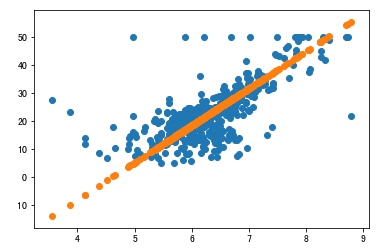

In [202]:
price_by_gradient_descent = [price(best_k, r, best_b) for r in x]

draw_x_and_y()
plt.scatter(x, price_by_gradient_descent)

### 4.Try different Loss funciton and learning rate.

$$loss_2=\frac{1}{n}\sum{|y_i-\hat{y_i}|}$$

$$if\quad y_i>\hat{y_i} \quad or \quad y_i<\hat{y_i}$$
$$d_k=-\frac{1}{n}\sum{(y_i-\hat{y_i})x_i},d_b=-\frac{1}{n}\sum{(y_i-\hat{y_i})}$$

$$if y_i==\hat{y_i}$$
$$d_k=0,d_b=0$$

In [228]:
def partial_k_(x, y, y_hat):
    k_gradient = 0
    for x_i, y_i, y_i_hat in zip(list(x), list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: k_gradient += 0
        else:
            k_gradient += (y_i - y_i_hat) * x_i
    return (-1 / len(y)) * k_gradient

def partial_b_(y, y_hat):
    b_gradient = 0
    for y_i, y_i_hat in zip(list(y),list(y_hat)):
        if abs(y_i - y_i_hat) < 1e-5: b_gradient += 0
        else:
            b_gradient += (y_i - y_i_hat)
    return (-1 / len(y)) * b_gradient

In [231]:
x = X[:,5]
y = Y[:] # data set

training_times = 2000
min_loss = float('inf')
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100
learning_rate = 1e-3

for i in range(training_times):
    price_by_gradient_descent = [price(best_k, rm, best_b) for rm in x]
    k_direction = partial_k_(x, y, price_by_gradient_descent)
    b_direction = partial_b_(y, price_by_gradient_descent)
    
    # upadate
    best_k -= k_direction * learning_rate
    best_b -= b_direction * learning_rate
    cur_loss = abs_loss(x, price_by_gradient_descent)
    print('times {} \tk:{},\tb:{},\tloss:{}'.format(i, best_k, best_b, cur_loss))

times 0 	k:10.123279832272727,	b:-59.98031353754941,	loss:5.794393280632411
times 1 	k:10.241506065097331,	b:-59.96142153023443,	loss:5.452321940829269
times 2 	k:10.354885781362599,	b:-59.94329142357507,	loss:5.186688649878144
times 3 	k:10.463617578259456,	b:-59.92589199708603,	loss:5.000623761985901
times 4 	k:10.567891915001958,	b:-59.909193309613265,	loss:4.914837232233743
times 5 	k:10.667891446299624,	b:-59.89316664691038,	loss:4.890521219187378
times 6 	k:10.76379134216496,	b:-59.87778447136331,	loss:4.916194648303928
times 7 	k:10.855759594616151,	b:-59.863020373775086,	loss:5.002767456649539
times 8 	k:10.943957311811884,	b:-59.84884902712635,	loss:5.149503614792408
times 9 	k:11.028539000133339,	b:-59.83524614223064,	loss:5.327950572374444
times 10 	k:11.109652834707209,	b:-59.82218842520678,	loss:5.541948571836174
times 11 	k:11.18744091884342,	b:-59.80965353669401,	loss:5.791637725635089
times 12 	k:11.262039532841799,	b:-59.79762005273823,	loss:6.065574166725925
times 13 

times 239 	k:12.998246640399357,	b:-59.455266454432454,	loss:16.232980402373613
times 240 	k:12.998205163369432,	b:-59.45496760946544,	loss:16.233014600703246
times 241 	k:12.998163466846565,	b:-59.45466880267543,	loss:16.23304737112035
times 242 	k:12.998121559848057,	b:-59.4543700326448,	loss:16.233078772137176
times 243 	k:12.998079451021708,	b:-59.45407129801405,	loss:16.23310885986844
times 244 	k:12.99803714866095,	b:-59.45377259747934,	loss:16.233137688129357
times 245 	k:12.997994660719376,	b:-59.453473929790306,	loss:16.233165308529884
times 246 	k:12.99795199482466,	b:-59.453175293747776,	loss:16.23319177056524
times 247 	k:12.997909158291915,	b:-59.45287668820174,	loss:16.233217121702435
times 248 	k:12.9978661581365,	b:-59.4525781120493,	loss:16.23324140746337
times 249 	k:12.997823001086303,	b:-59.45227956423276,	loss:16.233264671504646
times 250 	k:12.99777969359352,	b:-59.45198104373775,	loss:16.233286955693853
times 251 	k:12.997736241845956,	b:-59.45168254959148,	loss:

times 714 	k:12.976188550583975,	b:-59.31409809630672,	loss:16.233523729628352
times 715 	k:12.976141970149826,	b:-59.313801792668066,	loss:16.23352308503223
times 716 	k:12.97609539027574,	b:-59.31350549259205,	loss:16.233522440443842
times 717 	k:12.97604881096171,	b:-59.31320919607863,	loss:16.233521795863236
times 718 	k:12.976002232207733,	b:-59.31291290312777,	loss:16.23352115129032
times 719 	k:12.9759556540138,	b:-59.312616613739415,	loss:16.233520506725185
times 720 	k:12.975909076379907,	b:-59.31232032791353,	loss:16.233519862167807
times 721 	k:12.975862499306043,	b:-59.31202404565008,	loss:16.23351921761817
times 722 	k:12.975815922792204,	b:-59.311727766949005,	loss:16.233518573076278
times 723 	k:12.975769346838382,	b:-59.311431491810275,	loss:16.23351792854214
times 724 	k:12.975722771444572,	b:-59.31113522023384,	loss:16.233517284015715
times 725 	k:12.975676196610765,	b:-59.310838952219655,	loss:16.23351663949709
times 726 	k:12.975629622336955,	b:-59.310542687767686,	

times 1871 	k:12.92266780177915,	b:-58.97364629719078,	loss:16.232783090942597
times 1872 	k:12.922621864857767,	b:-58.973354087012865,	loss:16.232782455251552
times 1873 	k:12.922575928488712,	b:-58.97306188034837,	loss:16.23278181956814
times 1874 	k:12.922529992671977,	b:-58.972769677197256,	loss:16.232781183892364
times 1875 	k:12.922484057407559,	b:-58.97247747755948,	loss:16.232780548224245
times 1876 	k:12.922438122695446,	b:-58.972185281434996,	loss:16.23277991256378
times 1877 	k:12.922392188535635,	b:-58.97189308882377,	loss:16.232779276910914
times 1878 	k:12.92234625492812,	b:-58.97160089972575,	loss:16.232778641265725
times 1879 	k:12.922300321872893,	b:-58.9713087141409,	loss:16.23277800562818
times 1880 	k:12.922254389369947,	b:-58.97101653206918,	loss:16.23277736999827
times 1881 	k:12.922208457419275,	b:-58.97072435351054,	loss:16.232776734376
times 1882 	k:12.922162526020871,	b:-58.97043217846495,	loss:16.232776098761363
times 1883 	k:12.92211659517473,	b:-58.97014000

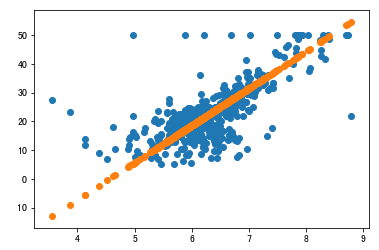

In [234]:
price_by_gradient_descent = [price(best_k, r, best_b) for r in x]

draw_x_and_y()
plt.scatter(x, price_by_gradient_descent)

# Answer following questions:

#### 1.Why do we need machine learning methods instead of creating a complicated formula?

ANS:随着问题的复杂度加深，传统方法的函数表达形式非常复杂；而机器学习的方法可以利用数据自动生成。

#### 2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

ANS: 需要足够多的试验次数，时间消耗多

#### 3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

ANS: 2nd方法优于1st方法. 2nd方法direction的搜索空间随着问题复杂增大，同时不能保证每一次试验都能获得正确的下降方向.

#### 4.Why do we use Derivative / Gredient to fit a target function?

ANS: 导数/梯度 的反方向是 目标函数 的下降方向.

#### 5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

ANS:Gredient指的是目标函数的变化，Descent是利用Gradient进行参数更新的方法.

#### 6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

ANS:每一步都可以获得目标函数下降的方向.

#### 7. Using the simple words to describe: What's the machine leanring.

ANS: 如何根据数据自动生成函数.

# Finish the search problem

### 1. Get data from web page

In [1]:
import requests
import re
 
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'
}
url = "https://baike.baidu.com/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%81/1579058"

r = requests.get(url, headers = headers)
r.encoding = 'utf-8'

with open('subway_baike.txt', 'w', encoding='utf-8') as fp:
    fp.write(r.text)

### 2. Preprocessing data from page source

#### 上一步爬取了广州地铁，下一步爬取 地铁线路

In [169]:
from bs4 import BeautifulSoup

In [170]:
soup = BeautifulSoup(r.text, 'lxml')
#print(soup.prettify())
#print(soup.title.string)
get_lines = r'<a data-lemmaid.*?href="(.*?)".*?>\n    (广州地铁.*?)\n   </a>'
pattern = re.compile(get_lines)
lines_table = soup.table.prettify()
likes = pattern.findall(lines_table)

In [171]:
likes

[('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/5185293',
  '广州地铁1号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/6162023',
  '广州地铁2号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/6162147',
  '广州地铁3号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF/6162210',
  '广州地铁4号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF/6786593',
  '广州地铁5号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%816%E5%8F%B7%E7%BA%BF/1674272',
  '广州地铁6号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%817%E5%8F%B7%E7%BA%BF/5892921',
  '广州地铁7号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF/3122926',
  '广州地铁8号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%819%E5%8F%B7%E7%BA%BF/6552289',
  '广州地铁9号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF/9335245',
  '广州地铁13号线'),
 ('/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF/5041514',
  '广州地铁14号线'),
 ('/item/%E5%B9%B

#### 遍历每一条地铁线路，获得地铁站的连接信息

In [172]:
url_header = 'https://baike.baidu.com'
line = url_header + likes[2][0]
line

'https://baike.baidu.com/item/%E5%B9%BF%E5%B7%9E%E5%9C%B0%E9%93%813%E5%8F%B7%E7%BA%BF/6162147'

In [173]:
from collections import defaultdict  
url_header = 'https://baike.baidu.com'

In [174]:
def get_information(line):
    res = requests.get(line, headers=headers)
    res.encoding = 'utf-8'
    
    line_soup = BeautifulSoup(res.text, 'lxml')
    line_str = line_soup.table.prettify()
    
    get_station = r'<a .*?href="(.*?)" target="_blank">\n    (.*?站)\n'
    station_pattern = re.compile(get_station)
    
    station_list = station_pattern.findall(line_str)
    
    return [tup[1].strip() for tup in station_list]

In [175]:
station_connection = defaultdict(list)

In [176]:
for k,item in enumerate(likes):
    # if k == 3: break
    line = url_header + item[0]
    sta_list = get_information(line)
    #print(sta_list)
    for i in range(len(sta_list)-1):
        station_connection[sta_list[i]].append(sta_list[i+1])
        station_connection[sta_list[i+1]].append(sta_list[i])
        
station_connection

defaultdict(list,
            {'一德路站': ['文化公园站', '海珠广场站'],
             '万胜围站': ['官洲站', '车陂南站', '琶洲站'],
             '三元里站': ['飞翔公园站', '广州火车站'],
             '三溪站': ['东圃站', '鱼珠站'],
             '东圃站': ['车陂南站', '三溪站'],
             '东山口站': ['烈士陵园站', '杨箕站', '东湖站', '区庄站'],
             '东晓南站': ['江泰路站', '南洲站'],
             '东涌站': ['庆盛站', '低涌站'],
             '东湖站': ['团一大广场站', '东山口站'],
             '东风站': ['新和站'],
             '中大站': ['晓港站', '鹭江站'],
             '中山八站': ['坦尾站', '西场站'],
             '中新站': ['镇龙站', '坑贝站'],
             '五山站': ['华师站', '天河客运站'],
             '五羊邨站': ['杨箕站', '珠江新城站'],
             '京溪南方医院站': ['梅花园站', '同和站'],
             '人和站': ['龙归站', '高增站'],
             '会江站': ['南浦站', '石壁站'],
             '低涌站': ['东涌站', '海傍站'],
             '体育中心南站': ['天河南站', '林和西站'],
             '体育中心站': ['体育西路站', '广州东站'],
             '体育西路站': ['杨箕站', '体育中心站', '珠江新城站', '石牌桥站'],
             '公园前站': ['西门口站', '农讲所站', '纪念堂站', '海珠广场站'],
             '农讲所站': ['公园前站', '烈士陵园站'],
             '凤凰

In [16]:
import networkx as nx
% matplotlib inline

In [17]:
station_graph = nx.Graph()

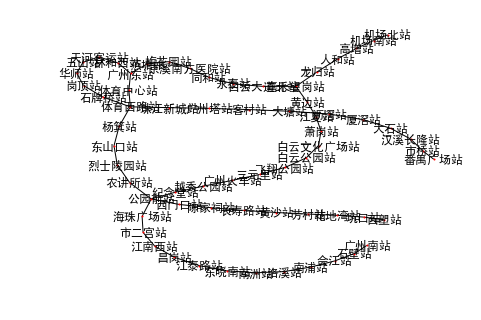

In [121]:
station_with_road = nx.Graph(station_connection)
nx.draw(station_with_road, with_labels=True, node_size=1)

#### 目前利用Networkx可视化效果比较差，会混在一起，上图只可视化其中一部分线路图

### 3. Build the search agent

In [241]:
def search(start, position, connection, sorted_candidate=False, by_way=False):
    pathes = [[start]]
    seen_ = set()
    
    while pathes:
        # print(pathes)
        path = pathes.pop()

        cur_station = path[-1]
        
        if cur_station in seen_: continue

        for i,next_sta in enumerate(connection[cur_station]):
            # print('{},{}'.format(i,next_sta))
            if next_sta in path: continue
            new_path = path + [next_sta]
            if next_sta == position: return new_path
            else:
                pathes = [new_path] + pathes
        
        seen_.add(cur_station)
        
        if sorted_candidate: pathes = sorted_candidate(pathes)

In [242]:
def pretty_print(cities):
    print('🐌->'.join(cities))

In [243]:
result = search('万胜围站', '广州南站', station_connection)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->钟村站🐌->谢村站🐌->石壁站🐌->广州南站


### 4. (optional) different policies for transfer system

#### 优先站点少

In [244]:
def transfer_station_first(pathes):
    return sorted(pathes, key = len, reverse=True)

In [245]:
result = search('万胜围站', '广州南站', station_connection, transfer_station_first)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->钟村站🐌->谢村站🐌->石壁站🐌->广州南站


#### 优先站点多

In [246]:
def transfer_station_as_much(pathes):
    return sorted(pathes, key = len)

In [247]:
result = search('万胜围站', '广州南站', station_connection, transfer_station_as_much)
pretty_print(result)

万胜围站🐌->官洲站🐌->大学城北站🐌->大学城南站🐌->板桥站🐌->员岗站🐌->南村万博站🐌->汉溪长隆站🐌->大石站🐌->厦滘站🐌->沥滘站🐌->大塘站🐌->客村站🐌->广州塔站🐌->珠江新城站🐌->体育西路站🐌->杨箕站🐌->东山口站🐌->烈士陵园站🐌->农讲所站🐌->公园前站🐌->西门口站🐌->陈家祠站🐌->长寿路站🐌->黄沙站🐌->文化公园站🐌->一德路站🐌->海珠广场站🐌->市二宫站🐌->江南西站🐌->昌岗站🐌->江泰路站🐌->东晓南站🐌->南洲站🐌->洛溪站🐌->南浦站🐌->会江站🐌->石壁站🐌->广州南站


#### 要求经过某个站点